## Test 4: A multimodal probability distribution in 2D

In [1]:

import sys
import numpy as np

import os

%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../Code'))
from Adaptive_Sampler import Adaptive_Sampler

from time import time


In [2]:
# multimodal gaussian
def ln_prob(p,c,h):
    s = 0.0
    for i in range(c.shape[1]):
        s += h[i]*np.exp(-((p[0]-c[0,i])**2 + (p[1]-c[1,i])**2)/2.0)
    return np.log(s)


In [3]:

#  x y positions
c = np.array([[-6.0, 6.0, -6.0, 6.0], \
              [-6.0, -6.0, 6.0, 6.0]])

c = 100.0*(np.random.rand(2,10)-np.array([[0.5,0.5]]).T)
# heights
h = 1.0 + np.random.rand(c.shape[1])

print('c:', c)
print('h:',h)

p_guess = np.array([0.0,0.0])


ndim = p_guess.shape[0]

nchains = 100

start = np.empty((nchains,ndim))
for chain in range(nchains):
    start[chain] = p_guess + 1.0 * np.random.randn(ndim)



c: [[-41.53788185 -43.60697319  22.62650047  28.15818013  34.24660262
  -48.64251611  36.97448241 -12.41118036 -26.4545343   -6.81018242]
 [-31.64561329  17.66141881  -4.04448325  23.12478733  28.75207151
  -44.4041839  -27.40647764  15.97730587 -15.90179023 -40.04972597]]
h: [1.71989908 1.9626035  1.76281066 1.09803875 1.15493949 1.56944897
 1.31507916 1.62444486 1.45656363 1.83271938]


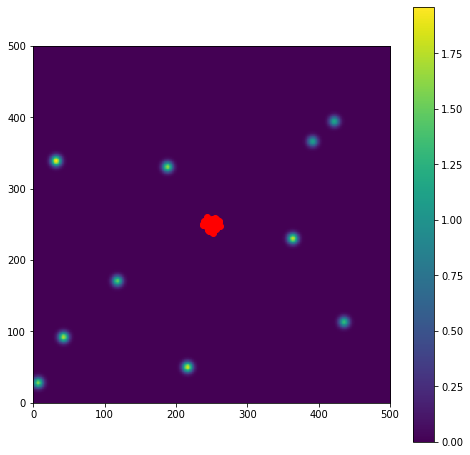

In [4]:

#
# Make an image of the probability distribution
#

x = np.linspace(-50.0,50.0,501)
y = np.linspace(-50.0,50.0,501)
X,Y = np.meshgrid(x,y)


Z = np.zeros((501,501))
for i in range(h.shape[0]):
    Z += h[i]*np.exp(-((X-c[0,i])**2 + (Y-c[1,i])**2)/2.0)


plt.figure(figsize=(8,8))
plt.imshow(Z,origin='lower')
plt.colorbar()
plt.scatter((start[:,0]+50)*500/100,(start[:,1]+50)*500/100,c='r') 



alpha: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]

alpha: [1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1]

alpha: [1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21
 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21
 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21
 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21

//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log



alpha: [1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.21
 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331
 1.331 1.331 1.331 1.331 1.21  1.331 1.331 1.331 1.331 1.331 1.331 1.331
 1.331 1.331 1.331 1.331 1.21  1.331 1.331 1.331 1.331 1.21  1.331 1.331
 1.21  1.331 1.21  1.331 1.21  1.331 1.331 1.331 1.331 1.331 1.331 1.331
 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331
 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.21  1.331 1.331 1.21  1.331
 1.21  1.331 1.331 1.331 1.21  1.331 1.331 1.331 1.331 1.331 1.331 1.331
 1.331 1.21  1.331 1.331]

alpha: [1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331
 1.4641 1.21   1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331
 1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.21   1.331
 1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331  1.331
 1.21   1.331  1.331  1.331  1.331  1.21   1.331  1.331  1.21   1.331
 1.21   1.331  1.21   1.3

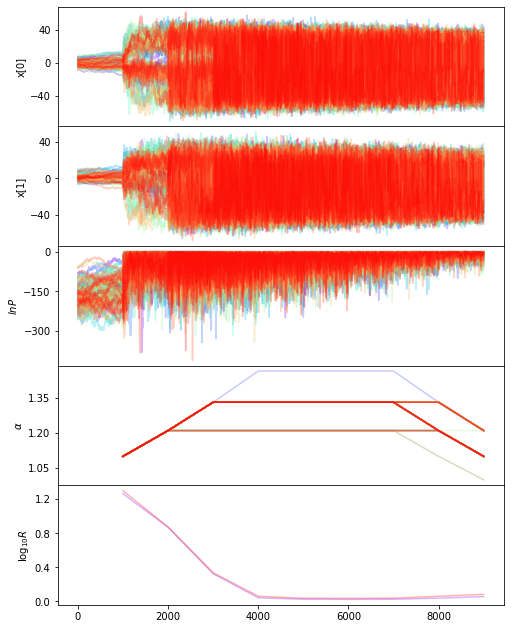

In [9]:
sampler = Adaptive_Sampler(ndim=ndim,nchains=nchains,ln_prob_fn=ln_prob,sigma=0.1*np.ones(ndim),initial_temperature=50,args=(c,h))

#
# Note that we use individual chain covariances so cannot use the GR convergence test
#
t0 = time()
for i in range(10):
    sampler.iterate_chains(1000,start=start,scale_individual_chains=True,temperature_change_rate=50.0/10000)
    print()
    print('alpha:',sampler.alpha)

print('time', time()-t0)
sampler.plot_chains(plot_to_file=False)




//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


parameter means and uncertainties:
[(-10.926871924868486, 43.73337190099077, 33.36920481684801), (-7.889988731982211, 30.62870490787739, 31.168425797259093)]


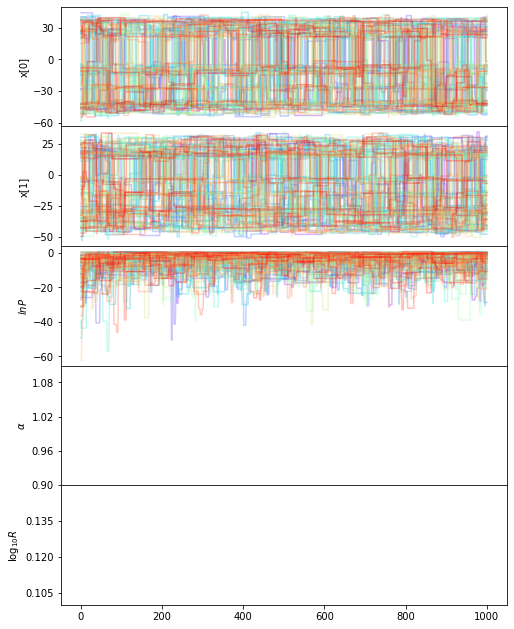

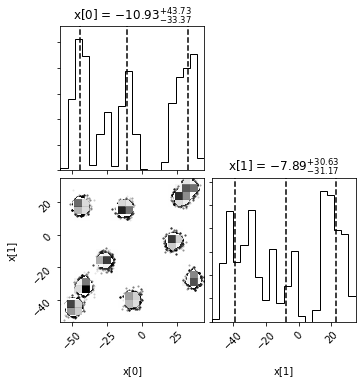

In [10]:

nsteps = 1000
sampler.reset()

sampler.iterate_chains(nsteps,scale_individual_chains=True)

params = list(map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), \
            zip(*np.percentile(sampler.chains[-nsteps:,:,:].reshape(nsteps*nchains,ndim), \
            [16, 50, 84], axis=0))))

print('parameter means and uncertainties:')
print(params)

sampler.plot_chains(plot_to_file=False)

sampler.plot_chain_corner(nsteps=nsteps,corner_kwargs={"plot_contours":False})




Now to detect the individual solutions.

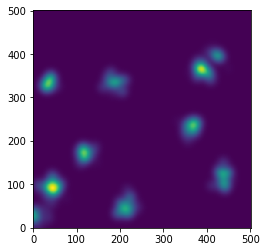

In [12]:
from sklearn.neighbors import KernelDensity

samples = sampler.chains[-20:,:,:].reshape(20*nchains,ndim)

kde_skl = KernelDensity(kernel='gaussian',bandwidth=2)
kde_skl.fit(samples)

xy =  np.vstack([X.ravel(), Y.ravel()]).T
score = np.exp(kde_skl.score_samples(xy))
score = score.reshape(X.shape)

plt.imshow(score,origin='lower')


(501, 501) [[1.85157357e-04 1.85157357e-04 1.85157357e-04 ... 3.16328302e-30
  1.78732250e-30 1.00174658e-30]
 [2.18538399e-04 2.18538399e-04 2.18538399e-04 ... 8.04175140e-30
  4.55068811e-30 2.55459201e-30]
 [2.55472938e-04 2.55472938e-04 2.55472938e-04 ... 2.02692666e-29
  1.14880628e-29 6.45951924e-30]
 ...
 [6.02382306e-49 7.15514482e-49 8.41703133e-49 ... 9.29779699e-33
  4.63329205e-33 2.28590125e-33]
 [1.44836290e-49 1.72023922e-49 2.02345185e-49 ... 3.70784086e-33
  1.84771132e-33 9.11602097e-34]
 [3.44789204e-50 4.09478342e-50 4.81613989e-50 ... 1.46396136e-33
  7.29534836e-34 3.59932123e-34]]
(501, 501) 10 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[-49.   -7.  -41.4  36.8 -26.6  22.4 -12.4 -43.2  28.6  33.8]
[-44.6 -39.4 -31.6 -27.2 -15.2  -4.2  15.8  17.4 

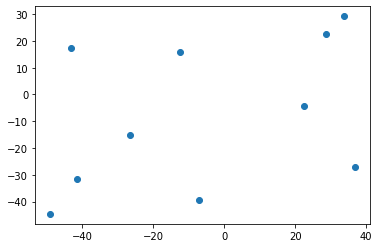

In [22]:
from scipy.ndimage.filters import maximum_filter

max_score = np.max(np.max(score))

#search for up to 20 solutions with relative probability > 1% of the maximum
ms = maximum_filter(score,size=20)
lm = (score == ms) * (score > 0.01 * max_score)

print(ms.shape,ms)

print(lm.shape,np.sum(lm),lm)

print(X[lm])
print(Y[lm])

plt.figure()
plt.scatter(X[lm],Y[lm])


Now we run new samplers for each detected solution. We use a small number of chains and scale our covariance matrix from the ensemble.

solution 0

parameter means and uncertainties:
[(-48.64909687685809, 0.986323614792525, 0.9623492233985047), (-44.418939185693596, 0.9774421853211379, 0.9715390186939246)]
solution 1

parameter means and uncertainties:
[(-6.807257847526574, 0.9831193376939611, 0.9919865551874176), (-40.059133835674814, 0.989970398723699, 0.9893062493244145)]
solution 2

parameter means and uncertainties:
[(-41.5021423457385, 0.9736862984606702, 1.020523010915106), (-31.66220116005354, 0.9868988297335974, 0.9992751345644564)]
solution 3

parameter means and uncertainties:
[(36.9792089427563, 0.996273569741625, 1.0009294792330792), (-27.42389769801348, 1.0215044657887447, 0.987160607353804)]
solution 4

parameter means and uncertainties:
[(-26.47221737195656, 0.9655464159751261, 0.9857986093547915), (-15.906177274259466, 1.000908568912699, 0.9955891138185642)]
solution 5

parameter means and uncertainties:
[(22.628914741267835, 1.017031409799987, 0.9766235754470465), (-4.059947658482849, 0.99362398692637

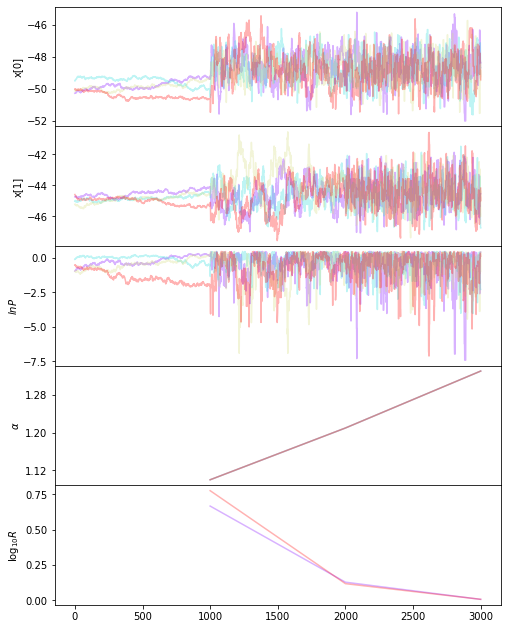

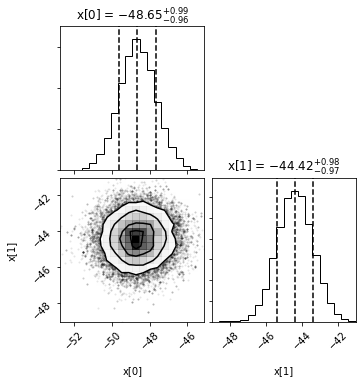

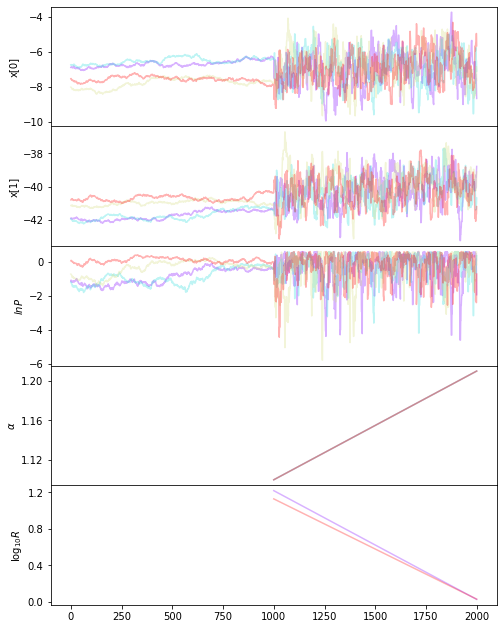

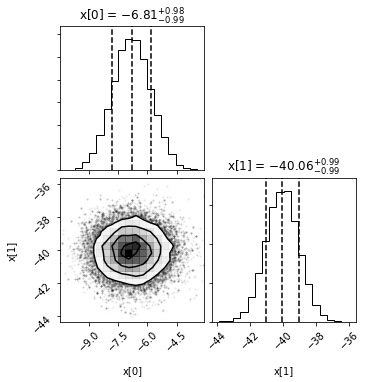

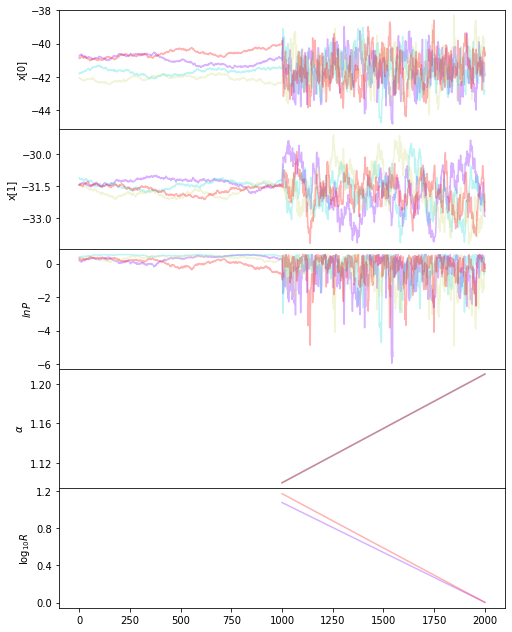

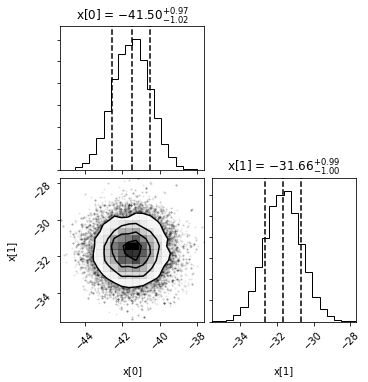

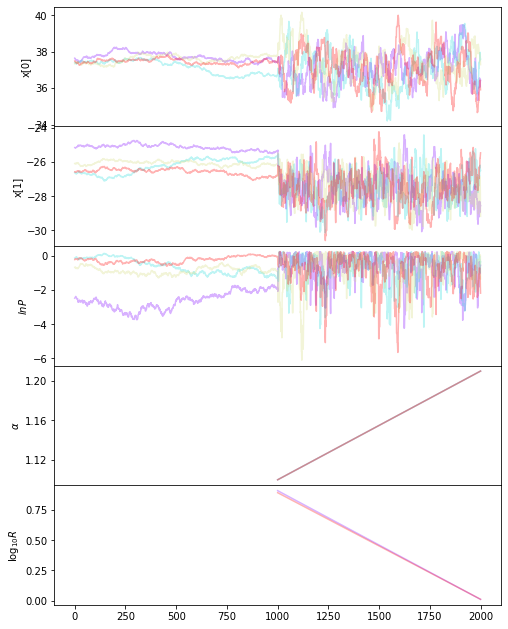

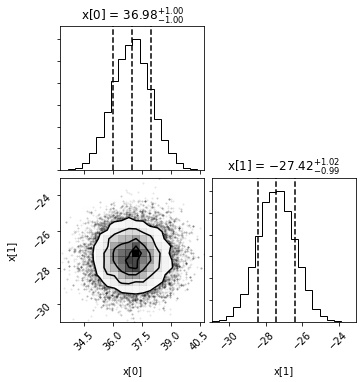

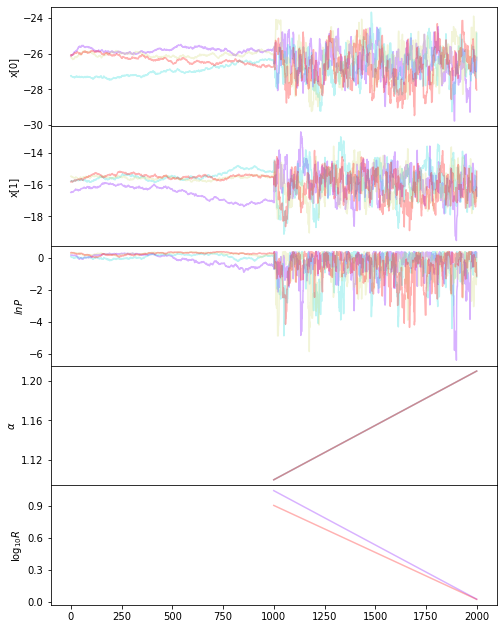

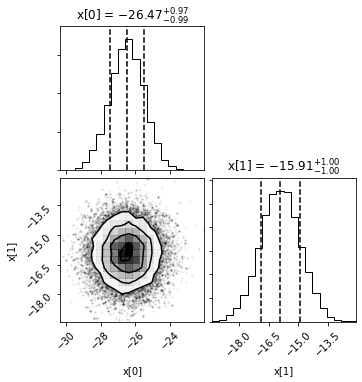

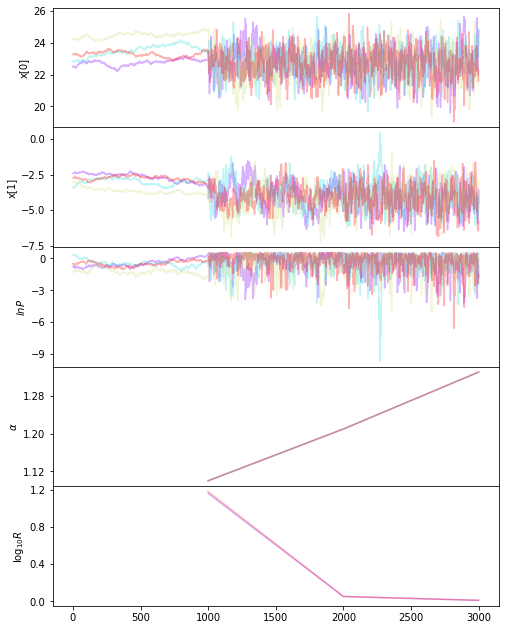

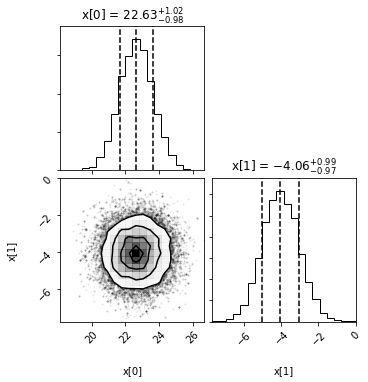

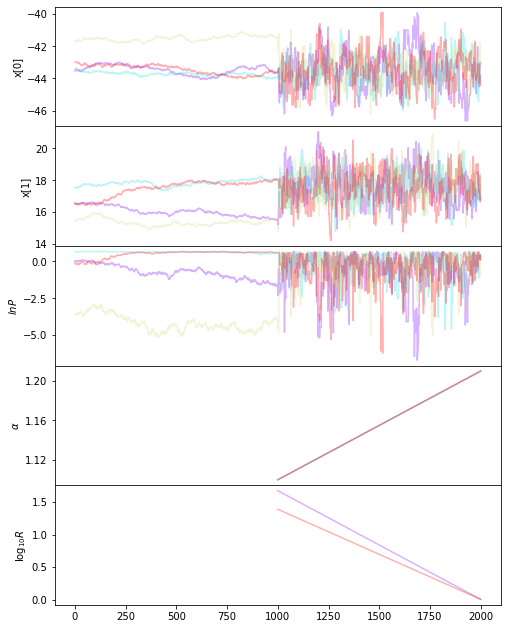

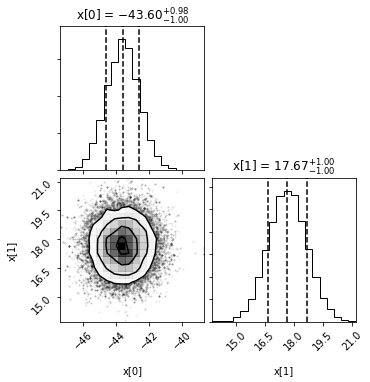

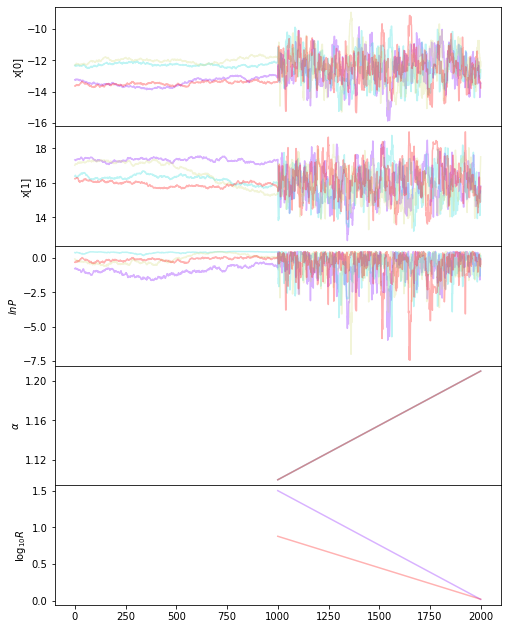

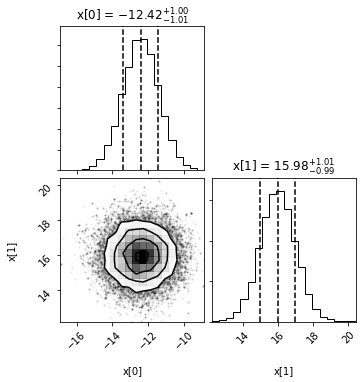

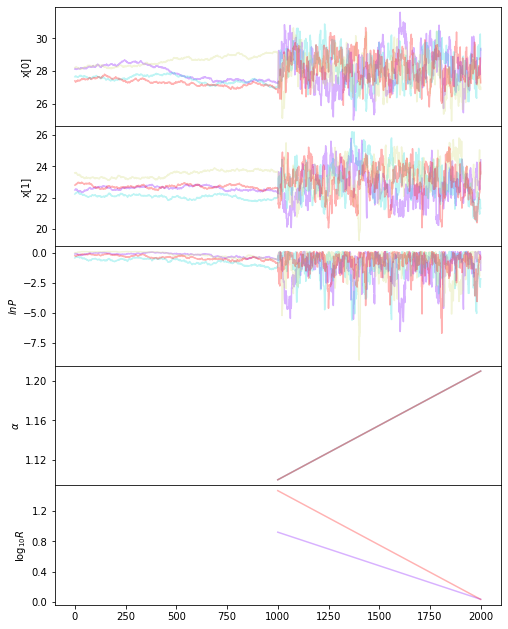

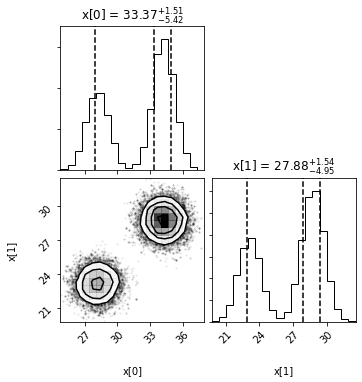

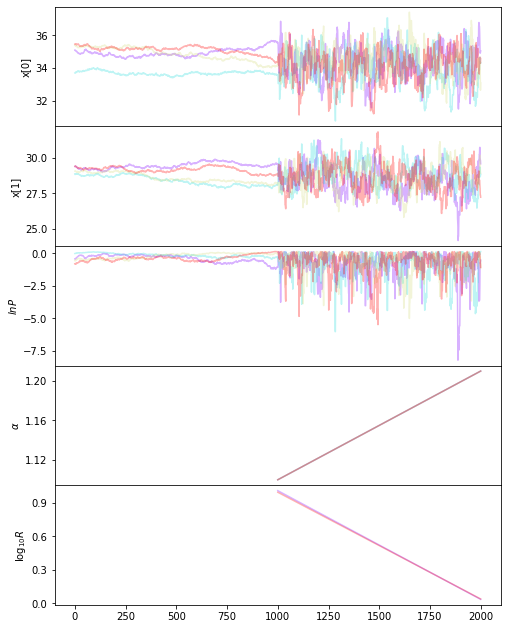

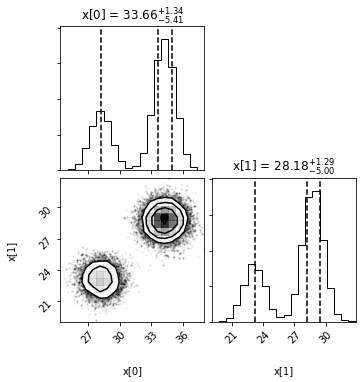

In [21]:
nchains = 4
nburnin = 1000
nsteps = 10000

for i in range(10):
    
    sampler = Adaptive_Sampler(ndim=ndim,nchains=nchains,ln_prob_fn=ln_prob,sigma=0.02*np.ones(ndim),args=(c,h))

    while np.max(sampler.R) > 1.1:
        sampler.iterate_chains(nburnin,start=np.array([X[lm][i],Y[lm][i]]),plot_progress=False)

    sampler.plot_chains(plot_to_file=False)

    sampler.reset()

    sampler.iterate_chains(nsteps)

    params = list(map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), \
                zip(*np.percentile(sampler.chains[-nsteps:,:,:].reshape(nsteps*nchains,ndim), \
                [16, 50, 84], axis=0))))

    print()
    print('solution',i)    
    print('parameter means and uncertainties:')
    print(params)

    sampler.plot_chain_corner(nsteps=nsteps,plot_to_file=False)



Let's try emcee with the same problem

In [14]:
import emcee
import corner

esampler = emcee.EnsembleSampler(nchains, ndim, ln_prob, args=(c,h))


In [15]:

emcee_start = [start[i].tolist() for i in range(nchains)]

t0 = time()

state, lnp , _ = esampler.run_mcmc(start, 10000)

print('time', time()-t0)


//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


time 34.790980100631714


In [16]:
esampler.reset()

state, lnp , _ = esampler.run_mcmc(start, 10000)


//anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


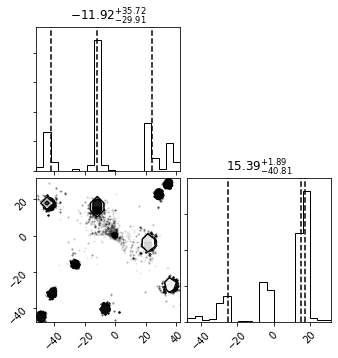

In [17]:
fig = corner.corner(esampler.flatchain,quantiles=[0.16, 0.5, 0.84],show_titles=True, title_args={"fontsize": 12})



(100, 10000, 2)


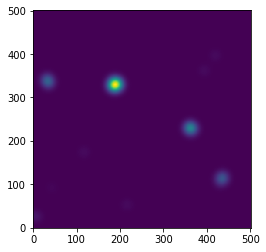

In [20]:
from sklearn.neighbors import KernelDensity

print(esampler.chain.shape)
samples = esampler.chain[:,-20:,:].reshape(20*nchains,ndim)

kde_skl = KernelDensity(kernel='gaussian',bandwidth=2)
kde_skl.fit(samples)

xy =  np.vstack([X.ravel(), Y.ravel()]).T
score = np.exp(kde_skl.score_samples(xy))
score = score.reshape(X.shape)

plt.imshow(score,origin='lower')


In [ ]:
esampler = emcee.EnsembleSampler(nchains, ndim, ln_prob, moves=emcee.moves.KDEMove(), args=(c,h))


In [ ]:
emcee_start = [start[i].tolist() for i in range(nchains)]

t0 = time()

state, lnp , _ = esampler.run_mcmc(start, 1000)

print('time', time()-t0)


In [ ]:
esampler.reset()

state, lnp , _ = esampler.run_mcmc(start, 10000)


In [ ]:
fig = corner.corner(esampler.flatchain,quantiles=[0.16, 0.5, 0.84],show_titles=True, title_args={"fontsize": 12})
